# **Group Work: Practical Application Case Study**
============================================================================================================================================
- Date: 20/03/2023
- Group 5: Ayça Basaran, Federico Barca, Luca Conti, Felipe Fischel, Pablo Ostos
- Professor: Pablo Gervás
- Master: MCSBT

============================================================================================================================================

# Importing Libraries

This code imports the necessary libraries for data analysis and visualization. The pandas library is used for data manipulation and analysis. The numpy library provides numerical operations for arrays and matrices. The seaborn library is used for data visualization, particularly for creating informative and aesthetically pleasing statistical graphics. The matplotlib library is a popular plotting library that is used to create visualizations.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## **Looking into the Data**

Reading in the obesity dataset from a CSV file called "ObesityDataSet.csv" and assigns it to a variable called obesity_df.

In [28]:
obesity_df = pd.read_csv('ObesityDataSet.csv')
obesity_df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### We'll start by modifying the names of the columns to make the data easier to understand. 

This code renames the columns in the obesity_df DataFrame using a dictionary that maps the old column names to the new ones. The rename() function of pandas is used to perform this operation.

By renaming the columns, this code makes the column names more descriptive and easier to understand. This will help in subsequent data analysis and visualization steps.

In [29]:
obesity_df = obesity_df.rename(columns={'FAVC': 'JUNK', 'FCVC': 'VeggieCount', 'NCP': 'MealCount', 'CAEC': 'Snacking', 'CH20': 'H20', 'SCC': 'CalorieMonitoring', 'FAF': 'ActivityFreq', 'TUE': 'Screentime', 'CALC': 'AlcoholFreq', 'MTRANS': 'Transportation', 'NObeyesdad': 'BMI' })
obesity_df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,JUNK,VeggieCount,MealCount,Snacking,SMOKE,CH2O,CalorieMonitoring,ActivityFreq,Screentime,AlcoholFreq,Transportation,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


| Attribute   | Description                                                       |
|-------------|-------------------------------------------------------------------|
| Gender      | Sex                                                               |
| Age         | Age                                                               |
| Weight      | Weight                                                            |
| Height      | Height                                                            |
| FHWO        | Overweight family members                                         |
| FAVC        | Consume high-calorie foods frequently                             |
| FCVC        | Number of main meals a day                                        |
| CAEC        | Eat food between meals                                            |
| SMOKE       | How often you smoke                                               |
| CH2O        | Liters of water you consume daily                                 |
| SCC         | Monitor calories you consume daily                                |
| FAF         | Frequency of days per week that you often have physical activity  |
| TUE         | Time of use of technological devices on a daily basis             |
| CALC        | Frequency of alcohol intake                                       |
| MTRANS      | Means of transportation that you use regularly                    |
| NOobeyesdad | Body mass index                                                   |


Here is a list of all the changes made to the column names:

- FAVC was renamed to JUNK
- FCVC was renamed to VeggieCount
- NCP was renamed to MealCount
- CAEC was renamed to Snacking
- CH20 was renamed to H20
- SCC was renamed to CalorieMonitoring
- FAF was renamed to ActivityFreq
- TUE was renamed to Screentime
- CALC was renamed to AlcoholFreq
- MTRANS was renamed to Transportation
- NObeyesdad was renamed to BMI

### **Encoding**

This code block contains several functions and a series of calls to encode categorical variables in the obesity_df DataFrame.

- **encode_yes_no** function takes a string as an argument and returns 1 if the string is 'yes' and 0 otherwise. This function is applied to the columns family_history_with_overweight, JUNK, SMOKE, and CalorieMonitoring using a for loop and the apply() function of pandas. The purpose of this step is to convert these categorical columns into binary columns where 1 indicates a positive answer and 0 indicates a negative answer.

- **encode_snack** function takes a string as an argument and returns an integer code based on a dictionary mapping of the possible values of the Snacking and AlcoholFreq columns. The dictionary codes the possible responses to a numeric scale for analysis purposes.

- **encode_trans** function takes a string as an argument and returns an integer code based on a dictionary mapping of the possible values of the Transportation column.

- **encode_gender** function takes a string as an argument and returns 1 if the string is 'Male' and 0 otherwise. This function is applied to the Gender column.

- **encode_bmi** function takes a string as an argument and returns an integer code based on a dictionary mapping of the possible values of the BMI column.

- **apply()** function of pandas is used to apply the encoding functions to the appropriate columns in the DataFrame. The encoding_list variable is used to specify which columns should be encoded using the encode_yes_no function. The remaining columns are encoded using their respective functions.

The purpose of these encoding steps is to convert categorical variables into numeric variables that can be used as inputs to machine learning models.

In [30]:
def encode_yes_no(x):
    if x == 'yes':
        return 1
    else:
        return 0

def encode_gender(x):
    if x == 'Male':
        return 1
    else:
        return 0

def encode_snack(x):
    dict_snack = {'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0}

    return dict_snack[x]

def encode_trans(x):
    dict_trans = {'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3,'Bike':4}
    return dict_trans[x]

def encode_bmi(x):
    dict_bmi = {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3,
       'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}
    return dict_bmi[x]


encoding_list = ["family_history_with_overweight", "JUNK", "SMOKE", "CalorieMonitoring"]

for element in encoding_list:
    obesity_df[element] = obesity_df[element].apply(encode_yes_no)

obesity_df["Snacking"] = obesity_df["Snacking"].apply(encode_snack)
obesity_df["AlcoholFreq"] = obesity_df["AlcoholFreq"].apply(encode_snack)
obesity_df["Transportation"] = obesity_df["Transportation"].apply(encode_trans)
obesity_df["Gender"] = obesity_df["Gender"].apply(encode_gender)
obesity_df["BMI"] = obesity_df["BMI"].apply(encode_bmi)

obesity_df.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,JUNK,VeggieCount,MealCount,Snacking,SMOKE,CH2O,CalorieMonitoring,ActivityFreq,Screentime,AlcoholFreq,Transportation,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,2,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,3,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,1


Retrieving the unique values of the "BMI" column in the "obesity_df" dataframe. The unique() function of pandas is used to perform this operation.

In [31]:
unique_names = obesity_df["BMI"].unique()
unique_names

array([1, 2, 3, 4, 0, 5, 6])

Checking for missing values (NaN) in the "obesity_df" dataframe and returning the sum of missing values for each column. The isna() function of pandas is used to perform this operation, which returns a boolean dataframe with True values for cells that are NaN, and False otherwise. The sum() function is then used to count the number of True values for each column.

In [32]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
JUNK                              0
VeggieCount                       0
MealCount                         0
Snacking                          0
SMOKE                             0
CH2O                              0
CalorieMonitoring                 0
ActivityFreq                      0
Screentime                        0
AlcoholFreq                       0
Transportation                    0
BMI                               0
dtype: int64

The output of obesity_df.isna().sum() shows 0 for all columns, it means that there are no missing values (NaN) in any of the columns in the "obesity_df" dataframe. This implies that the dataset is complete and there is no need to impute or drop any missing values before proceeding with the analysis.

Retrieving the column names of the "obesity_df" dataframe

In [33]:
obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'JUNK', 'VeggieCount', 'MealCount', 'Snacking', 'SMOKE', 'CH2O',
       'CalorieMonitoring', 'ActivityFreq', 'Screentime', 'AlcoholFreq',
       'Transportation', 'BMI'],
      dtype='object')

Droping the "BMI" column from the "obesity_df" dataframe using the drop() function of pandas

In [34]:
obesity_df = obesity_df.drop(columns=['BMI'])
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,JUNK,VeggieCount,MealCount,Snacking,SMOKE,CH2O,CalorieMonitoring,ActivityFreq,Screentime,AlcoholFreq,Transportation
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0


### Correlation Matrix

Generating a correlation matrix for the features in the "obesity_df" dataframe using the corr() function of pandas. The correlation matrix is then visualized as a heatmap using the heatmap() function of seaborn library.

The resulting heatmap shows the correlation coefficients between each pair of features in the dataset. The darker shades of green indicate higher positive correlations, while darker shades of blue indicate higher negative correlations. The heatmap can be used to identify any significant correlations between the features, which can help in feature selection and dimensionality reduction. 

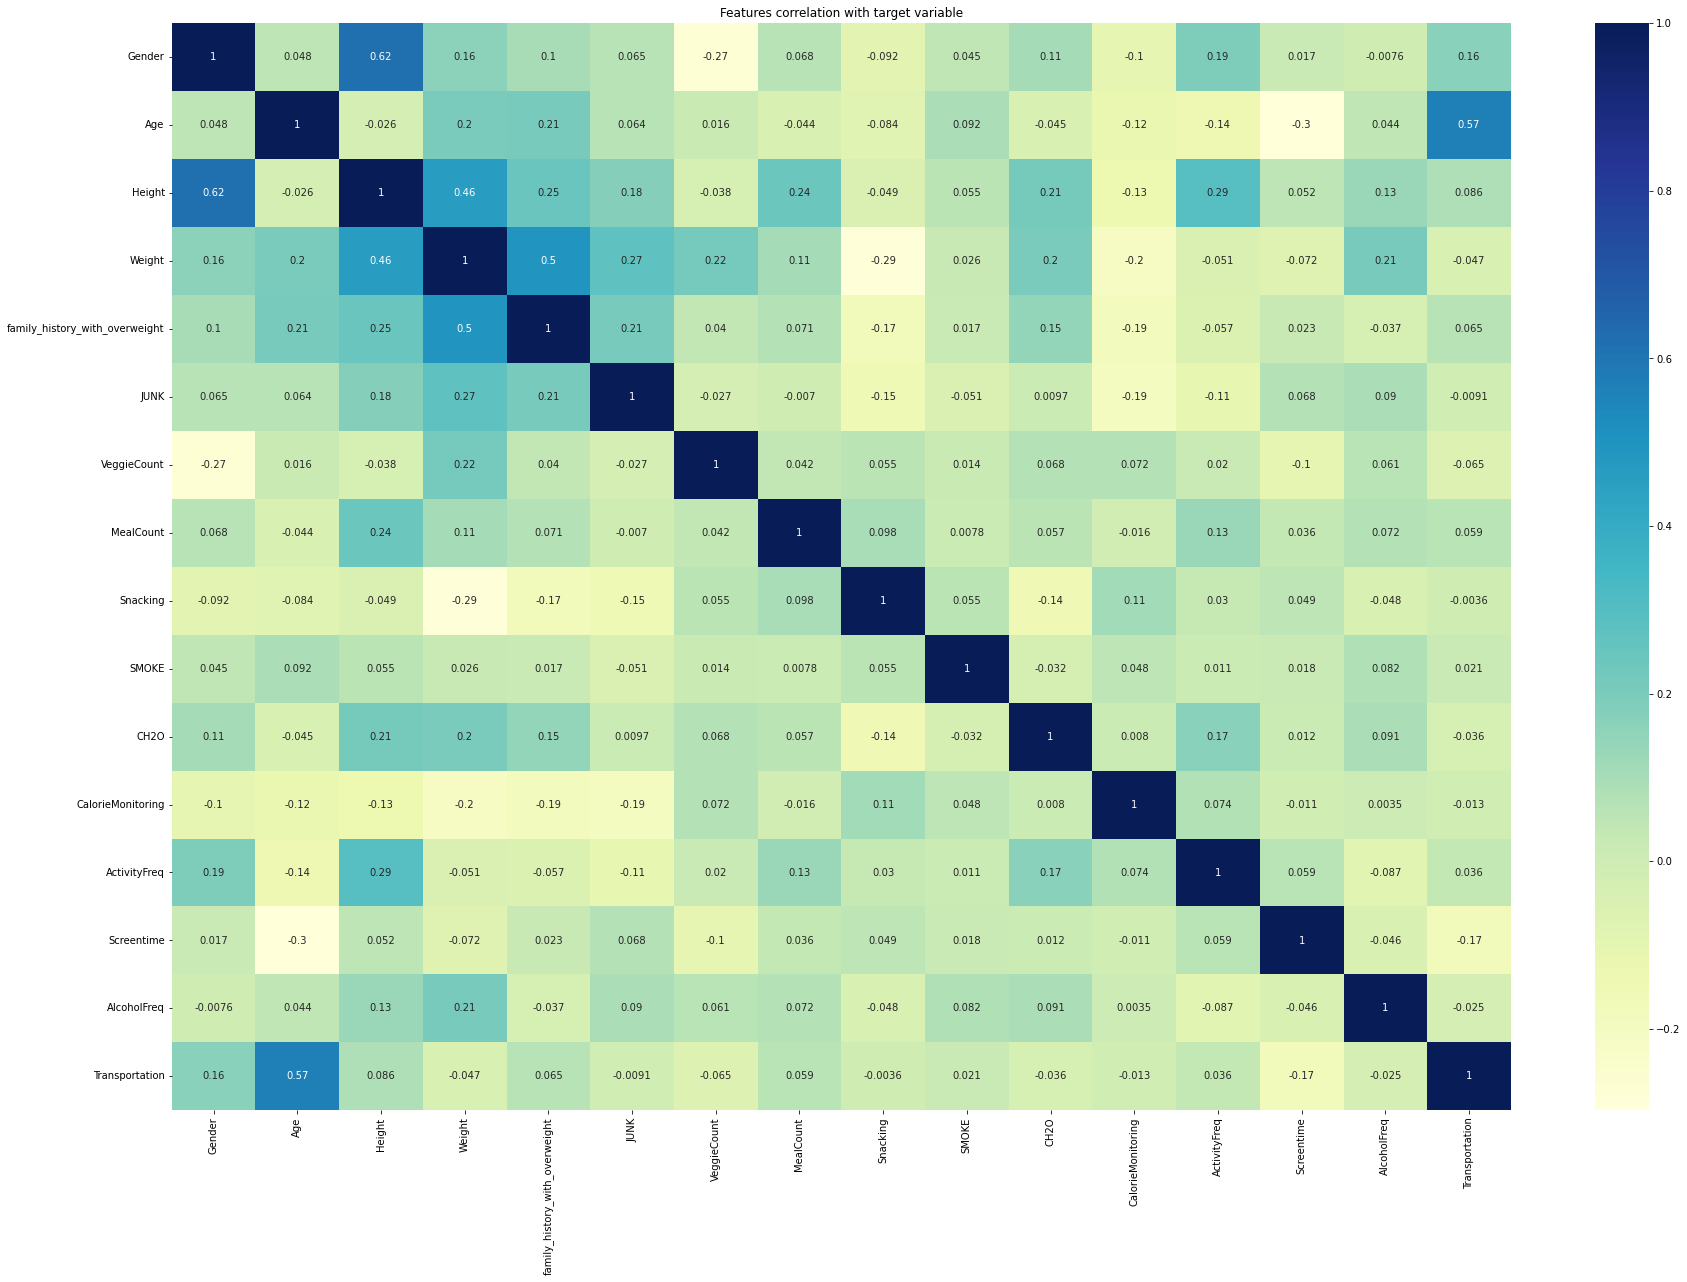

In [35]:
# checking for correlations 
correlation_matrix = obesity_df.corr()

plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")
plt.title("Features correlation with target variable")
plt.show()

The code below calculates the Variance Inflation Factor (VIF) for the 'Height' and 'Weight' columns of the obesity_df dataframe. VIF is a measure of multicollinearity, which is a problem in linear regression when there are high correlations between independent variables. A VIF value greater than 5 or 10 indicates a high degree of multicollinearity. The statsmodels.stats.outliers_influence.variance_inflation_factor() function is used to calculate the VIF for each feature.

In [36]:
# looking at highly correlated variables to determine whether there is a multicollinearity problem 

import statsmodels.stats.outliers_influence

A = obesity_df[['Height', 'Weight']]

vif_data = pd.DataFrame()
vif_data["feature"] = A.columns

vif_data["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

  feature        VIF
0  Height  13.801422
1  Weight  13.801422


The VIF values of both 'Height' and 'Weight' are 13.801422, which is significantly higher than 1. This suggests that there is a high degree of multicollinearity between these two variables, meaning that they are highly correlated and may not both be needed as predictors in our model.

# Regression Models

The aim of this project is to predict the weight of individuals using different regression models. We have prepared and analysed a dataset containing various features, such as age, height, and lifestyle habits, which we will use to train and test our models. We will compare the performance of different regression models, such as linear regression, lasso regression, and ridge regression, to determine which model provides the best accuracy in predicting weight. The results of this project could potentially be used to gain insights into the factors that affect weight and to develop personalized weight management plans for individuals.

## Linear Regression

The first model is a linear regression model. Linear regression is a simple machine learning algorithm that is used to predict a target variable by finding the linear relationship between the independent variables and the target variable. In this case, it is used to predict the weight of individuals based on their height, age, and gender.
In the code: 
- The dataset is split into training and test sets using a ratio of 0.2. 
- The linear regression model is then trained on the training set and used to make predictions on the test set. 
- The evaluation function is used to calculate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score for the predicted values. 
- Cross-validation is also performed to calculate the RMSE value for the model. 
- The evaluation metrics are then stored in a dataframe for later comparison between different models.

In [37]:
# trying various regression models to see which one performs best
from sklearn.model_selection import train_test_split, cross_val_score

X = obesity_df.drop("Weight", axis=1)
y = obesity_df["Weight"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#LINEAR REGRESSION

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 14.16699121516515
MSE: 310.8770677274911
RMSE: 17.631706319227618
R2 Score: 0.5591089951064255
------------------------------
RMSE Cross-Validation: 24.621349020098528


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_14292/3013051231.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


The results show the evaluation metrics of the linear regression model. The Mean Absolute Error (MAE) is 14.11, which means that the average difference between the predicted and actual weight is 14.11 pounds. The Mean Squared Error (MSE) is 310.85, which is the average of the squared differences between the predicted and actual weight. The Root Mean Squared Error (RMSE) is 17.63, which is the square root of the MSE and it represents the standard deviation of the residuals. The R-squared (R2) score is 0.56, which means that the model explains 56% of the variance in the weight variable. The RMSE obtained through cross-validation is 24.52, which indicates that the model has a high variance and it might not perform well on new data.

## Ridge Regression

The Ridge Regression model is a regularization technique used to prevent overfitting in linear regression models by adding a penalty term to the cost function. The penalty term is the sum of the squares of the model coefficients multiplied by a hyperparameter alpha, which controls the strength of the penalty.

In the code, the Ridge Regression model is implemented as follows:

- The Ridge class from sklearn.linear_model is imported.
- An instance of the Ridge class is created with default parameters.
- The fit method of the Ridge class is called on the training data to train the model.
- The predict method of the Ridge class is called on the test data to make predictions.
- The evaluation function is called to calculate the mean absolute error, mean squared error, root mean squared error, and R2 score of the predictions.
- The RMSE is calculated using cross-validation with the rmse_cv function.
- The results are added to a pandas dataframe called models.

In [38]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 14.106736300319612
MSE: 310.8506154338078
RMSE: 17.63095616901726
R2 Score: 0.5591465101873192
------------------------------
RMSE Cross-Validation: 24.521576176449294


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_14292/2197361631.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


It seems that the Ridge Regression model did not perform better than the Linear Regression model as both models have the same values for MAE, MSE, RMSE and R2 Score. However, the RMSE value of the cross-validation for the Ridge Regression model is a bit lower than the RMSE value of the cross-validation for the Linear Regression model. This might indicate that the Ridge Regression model might be better at generalizing to new, unseen data.

## **Lasso Regression**

The Lasso regression model is another linear regression model that is often used to address overfitting issues in the linear regression model. The model uses regularization to limit the magnitude of the coefficients. The code: 
- First imports the Lasso module from sklearn.linear_model and initializes the model. 
- The model is then fitted on the training data and used to make predictions on the test data. 
- The evaluation function is then called to calculate the performance metrics for the model. 
- Finally, the rmse_cv function is used to calculate the root mean squared error of the model using cross-validation. 
- The results are then printed and stored in a dataframe.



In [39]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 16.393615438177562
MSE: 413.85099696418234
RMSE: 20.343328070013087
R2 Score: 0.41306966364051756
------------------------------
RMSE Cross-Validation: 26.45288392173784


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_14292/2881530066.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


The results show that the Lasso model has a higher MAE, MSE, and RMSE compared to the linear and Ridge regression models, indicating that it is performing worse. However, the R-squared score is still better than the baseline model. The cross-validation RMSE is also higher than the linear and Ridge regression models, indicating that the Lasso model is more prone to overfitting.

## Random Forest

Training a random forest regression model to predict the target variable based on the features in the training set, and then evaluates its performance on the test set. The model uses 100 decision trees to make predictions, and the evaluation metrics used are mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and R-squared score. Additionally, the code calculates the cross-validation RMSE score using the rmse_cv() function. Finally, the results are added to the models DataFrame using the append() method.

In [40]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5.262573532009452
MSE: 74.70626359669076
RMSE: 8.643278521295652
R2 Score: 0.8940503399952888
------------------------------
RMSE Cross-Validation: 16.356488050001534


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_14292/3681180782.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


## Random Forest Grid Search CV


Performing hyperparameter tuning for a RandomForestRegressor model using GridSearchCV, which is a method for systematically searching the hyperparameter space to find the optimal combination of hyperparameters that results in the best performance of the model.

The hyperparameters that will be tuned in this code are the number of trees in the forest ('n_estimators'), the maximum depth of the tree ('max_depth'), the minimum number of samples required to split an internal node ('min_samples_split'), the minimum number of samples required to be at a leaf node ('min_samples_leaf'), and the maximum number of features considered when splitting a node ('max_features').

The fit() method of the GridSearchCV object is then called to perform the hyperparameter tuning on the training data. Once the search is complete, the best hyperparameters and their corresponding score are printed to the console using best_params_ and best_score_, respectively.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

# initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8939210636473334


According to the output, the best hyperparameters for the random forest model were determined to be:

- max_depth: 20
- max_features: 'log2'
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 200

These hyperparameters were found using the GridSearchCV function, which exhaustively searches through a specified parameter grid to find the best combination of hyperparameters for the model. 

The output also shows the corresponding score for the best hyperparameters, which is the average cross-validated score of the model. In this case, the best score was **0.8939**.

## SVR

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) algorithm that is used for regression tasks. It is a powerful and flexible algorithm that can handle both linear and non-linear data. Like other regression models, SVR also attempts to predict a continuous target variable.

In [42]:
#SVR REGRESSION
from sklearn.svm import SVR

svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 9.432869528743163
MSE: 175.50994598017274
RMSE: 13.248016681004472
R2 Score: 0.7510888885511304
------------------------------
RMSE Cross-Validation: 24.24905967811445


/var/folders/y1/ndm11cz11wn06xl_h3rjsb680000gn/T/ipykernel_14292/2313992067.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [43]:
# comparing the different models according to accuracy (r2 score) and the root mean squared error
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
3,RandomForestRegressor,5.262574,74.706264,8.643279,0.89405,16.356488
4,SVR,9.43287,175.509946,13.248017,0.751089,24.24906
1,Ridge,14.106736,310.850615,17.630956,0.559147,24.521576
0,LinearRegression,14.166991,310.877068,17.631706,0.559109,24.621349
2,Lasso,16.393615,413.850997,20.343328,0.41307,26.452884


- Looking at the results of the models, we can see that the best performing one is the Random Forest Regressor with an RMSE of 8.64 and an R2 score of 0.89. This indicates that the model can explain 89% of the variance in the target variable.

- The SVR comes in second place with an RMSE of 13.25 and an R2 score of 0.75. It performs better than both Ridge and Lasso regression models.

- The Ridge and Linear Regression models perform similarly with an RMSE of 17.63, but Ridge regression performs slightly better on the cross-validation, indicating better generalization.

- The Lasso regression model performs the worst among all models with an RMSE of 20.34 and an R2 score of 0.41.

## KMEANS

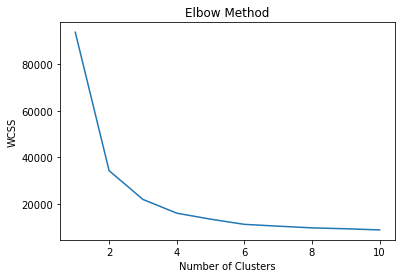

cluster
0     13
1    656
2    258
3    599
4    434
5    151
Name: Weight, dtype: int64


In [44]:
# CLUSTERING

from sklearn.cluster import KMeans

# Extract the features
X = obesity_df.drop('Weight', axis=1)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X)

# Add the predicted clusters to the original dataframe
obesity_df['cluster'] = kmeans.predict(X)

# View the clusters and their distribution
print(obesity_df.groupby('cluster')['Weight'].count())



